<a id="import"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Parkinson's disease</p>



<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 1 | Import Libraries</p>



In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


In [2]:
df=pd.read_csv('parkinsons.data')
print(df.shape,'\n')
df.head()# Hyperparameter Optimization for Logistic Regression Algorithms


(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
print(df.columns)


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [4]:
'''
To use columns of  df more efficiently following are some changes I have done
    a. pushing target column i.e 'status' to last column
    b. converting all column names in lower case
    c. replacing spaces in column names with '_'
    d. replacing ':' in column names with '_'
    e. replacing '(' in column names with '_'
    f. replacing ')' in column names with '' i.e blank
    g. replacing '%' in column names with 'in_percent'
'''

df = df.copy()                                               # creating a copy of loanDataOrg into loanData

targetCol = 'status'                                                    # defining target column
targetColDf = df.pop(targetCol)                                     # popping target column from loanData df
df.insert(len(df.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol 
del targetColDf

# converting column names into lower case
df.columns = [c.lower() for c in df.columns]
# replacing spaces in column names with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
# replacing ':' in column names with '_'
df.columns = [c.replace(':', '_') for c in df.columns]
# replacing '(' in column names with '_'
df.columns = [c.replace('(', '_') for c in df.columns]
# replacing ')' in column names with '' i.e blank
df.columns = [c.replace(')', '') for c in df.columns]
# replacing '%' in column names with 'in_percent'
df.columns = [c.replace('%', 'in_percent') for c in df.columns]

# to check the above printing top 5 rows
df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 3 | Dataset Overview</p>



In [5]:
print(df.status)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


<a id="basic"></a>
# <b><span style='color:#86B7E8'>Step 3.1 |</span><span style='color:#86B7E8'> Fundamental Details of the Dataset</span></b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [7]:
df.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 4 | Preprocessing steps</p>



____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 4.1 |</span><span style='color:#86B7E8'> Missing Value Treatment</span></b>

In [8]:
df.isna().sum()### is used to calculate the sum of missing values (NaN or null values)

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 4.1 |</span><span style='color:#86B7E8'> finding duplicated rows</span></b>

In [9]:
df.duplicated().sum()

0

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 4.2|</span><span style='color:#86B7E8'> finding outliers and skewness</span></b>

In [10]:
# Exclude non-numeric columns from skewness calculation
numeric_cols = df.select_dtypes(include=np.number).columns
skewness = df[numeric_cols].skew().sort_values(ascending=False)
print(skewness)


nhr                       4.220709
jitter_ddp                3.362058
mdvp_rap                  3.360708
mdvp_jitter_in_percent    3.084946
mdvp_ppq                  3.073892
mdvp_jitter_abs           2.649071
mdvp_apq                  2.618047
mdvp_fhi_hz               2.542146
mdvp_shimmer_db           1.999389
shimmer_apq5              1.798697
mdvp_shimmer              1.666480
shimmer_dda               1.580618
shimmer_apq3              1.580576
mdvp_flo_hz               1.217350
ppe                       0.797491
mdvp_fo_hz                0.591737
spread1                   0.432139
d2                        0.430384
spread2                   0.144430
dfa                      -0.033214
rpde                     -0.143402
hnr                      -0.514317
status                   -1.187727
dtype: float64


<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 5 | Visualization</p>



In [11]:
df["status"].value_counts() ###is used to count the occurrences of each unique value in the "status" column of the DataFrame df

status
1    147
0     48
Name: count, dtype: int64

In [12]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

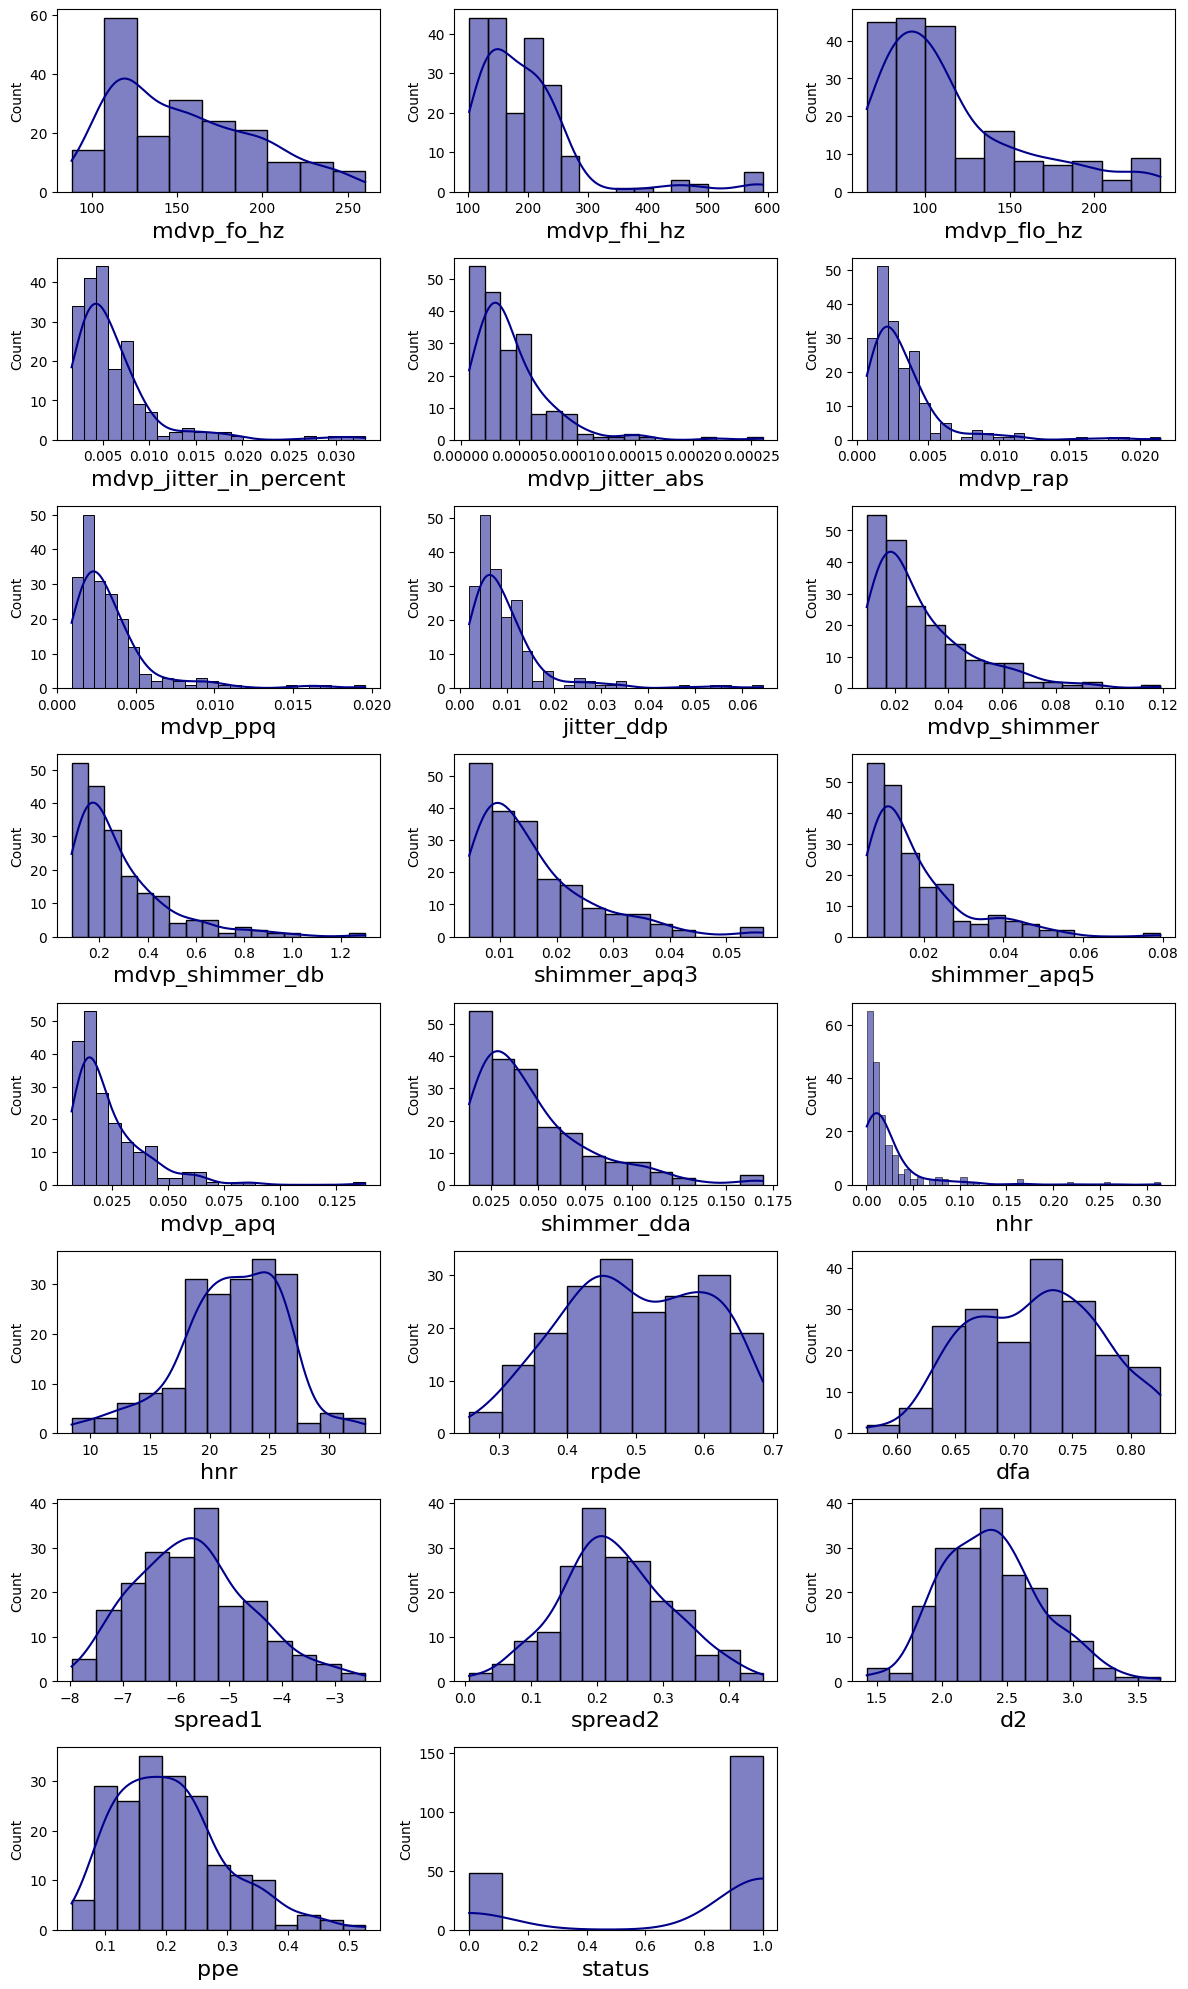

In [13]:
plot_data(df, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

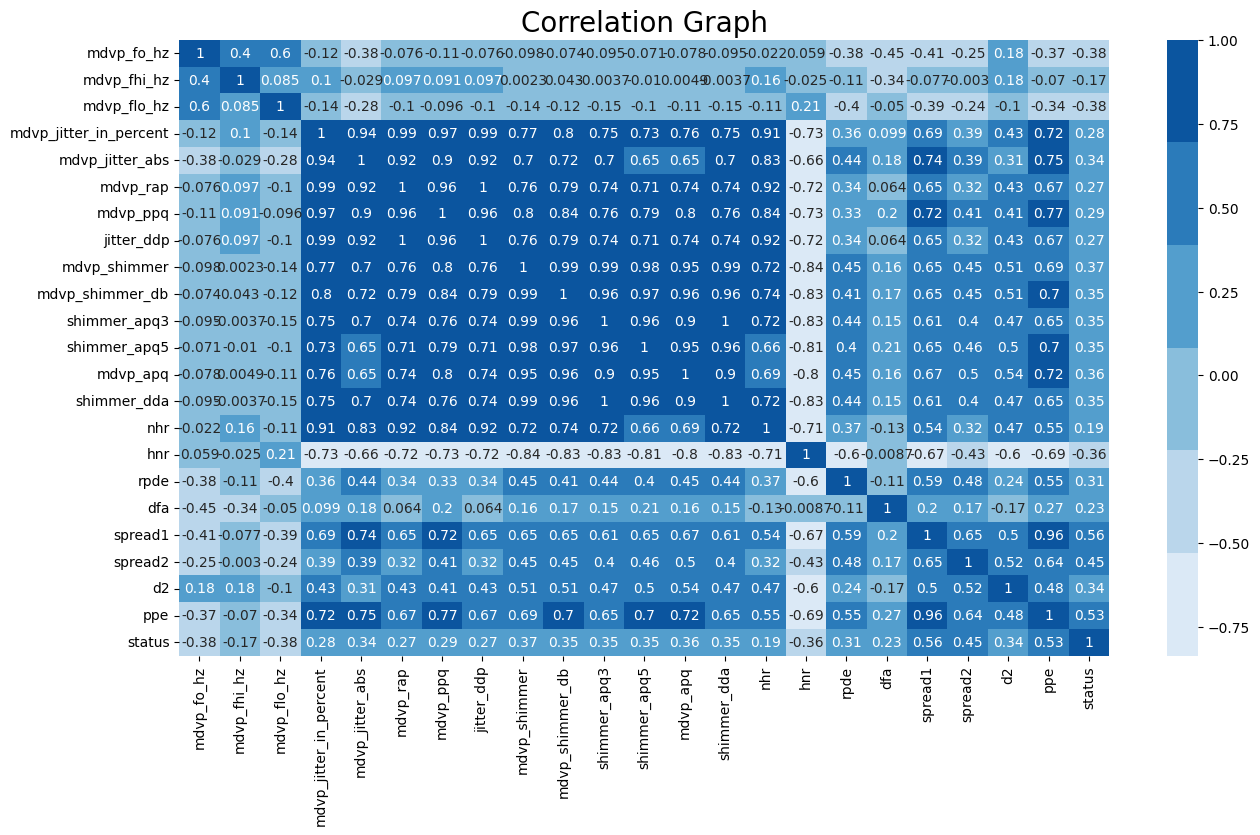

In [14]:
# Exclude non-numeric columns from correlation calculation
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

# Create a blue color map
cmap = sns.color_palette("Blues")

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap=cmap)

plt.show()


In [15]:
# Exclude non-numeric columns from correlation calculation
numeric_cols = df.select_dtypes(include=np.number).columns

correlation = df[numeric_cols].corr()
status_corr = correlation['status'].sort_values(ascending=False)


In [16]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,status
status,1.000000
spread1,0.564838
ppe,0.531039
spread2,0.454842
mdvp_shimmer,0.367430
mdvp_apq,0.364316
shimmer_apq5,0.351148
mdvp_shimmer_db,0.350697
shimmer_apq3,0.347617
shimmer_dda,0.347608


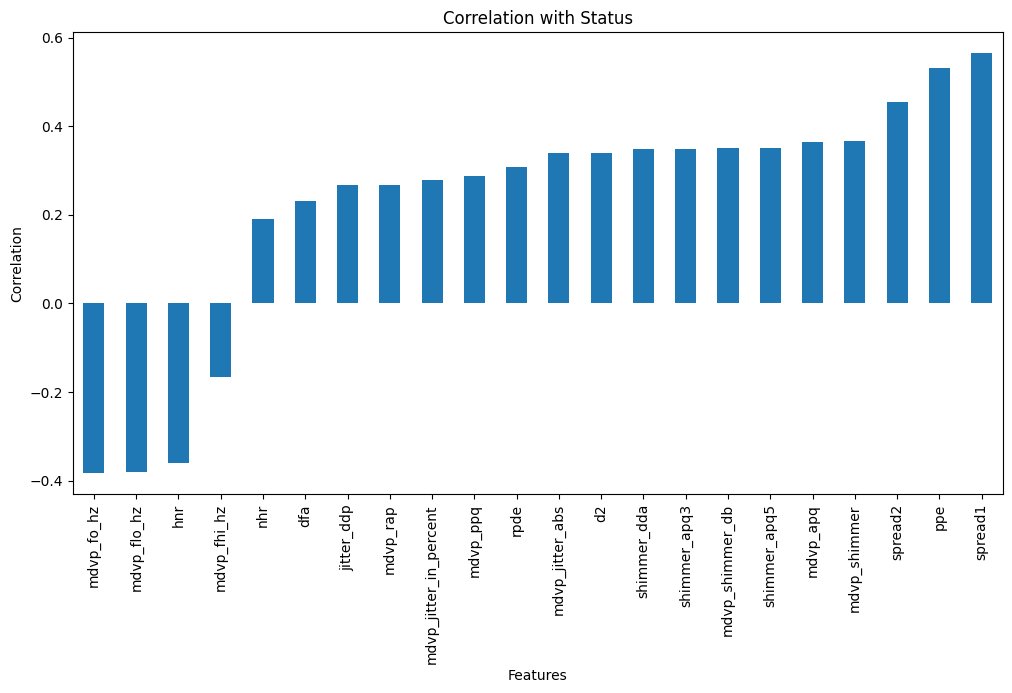

In [17]:
# Exclude non-numeric columns from correlation calculation
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate correlations
correlations = df[numeric_cols].corr()['status'][:-1].sort_values()

# Plotting
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Status')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 6 | Modeling</p>
​


In [18]:
# Define the features (X) and the output labels (y)
X=df.drop(['name','status'],axis=1)
y=df["status"]

In [19]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:

# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [21]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)


____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.1 |</span><span style='color:#86B7E8'> Logestic Classification</span></b>

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


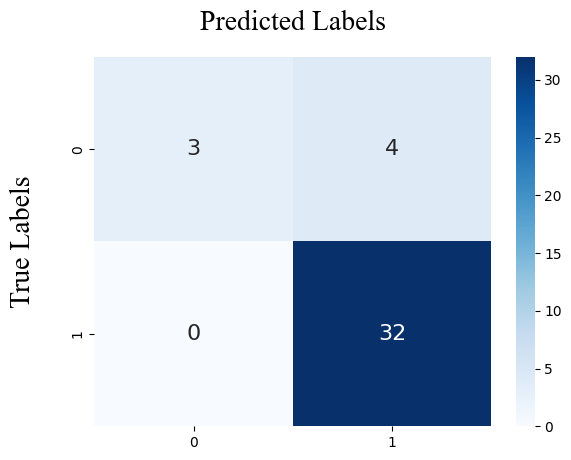

--------------------------------------------------------------------------------


In [22]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

In [23]:
cm=confusion_matrix(y_test,y_pred_LR)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[0,1]
FP=cm[1,0]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [24]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8974358974358975 
 The Missclassification = 1-Accuracy =  0.10256410256410253 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8888888888888888 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.42857142857142855 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.11111111111111116


C:\Users\anoou\AppData\Local\Temp\ipykernel_14908\1547213806.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',


____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.2 |</span><span style='color:#86B7E8'> SVM</span></b>

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


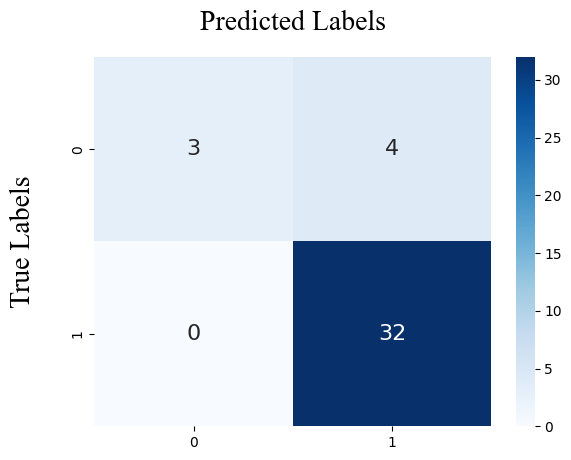

--------------------------------------------------------------------------------


In [25]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.3 |</span><span style='color:#86B7E8'> Decision Tree Classifier</span></b>

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 86.54
 ❖ Testing Accuracy Score :  92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
--------------------------------------------------------------------------------


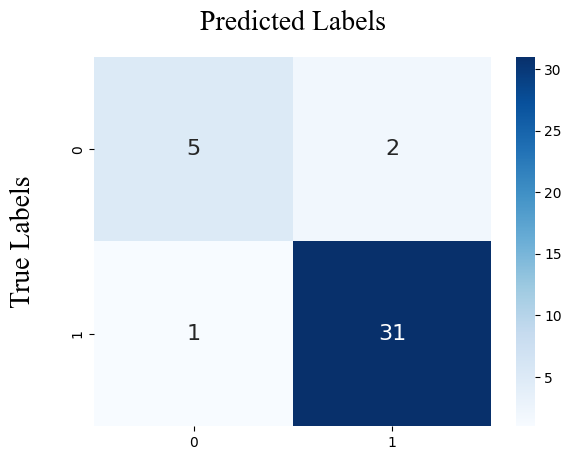

--------------------------------------------------------------------------------


DECISION TREE :


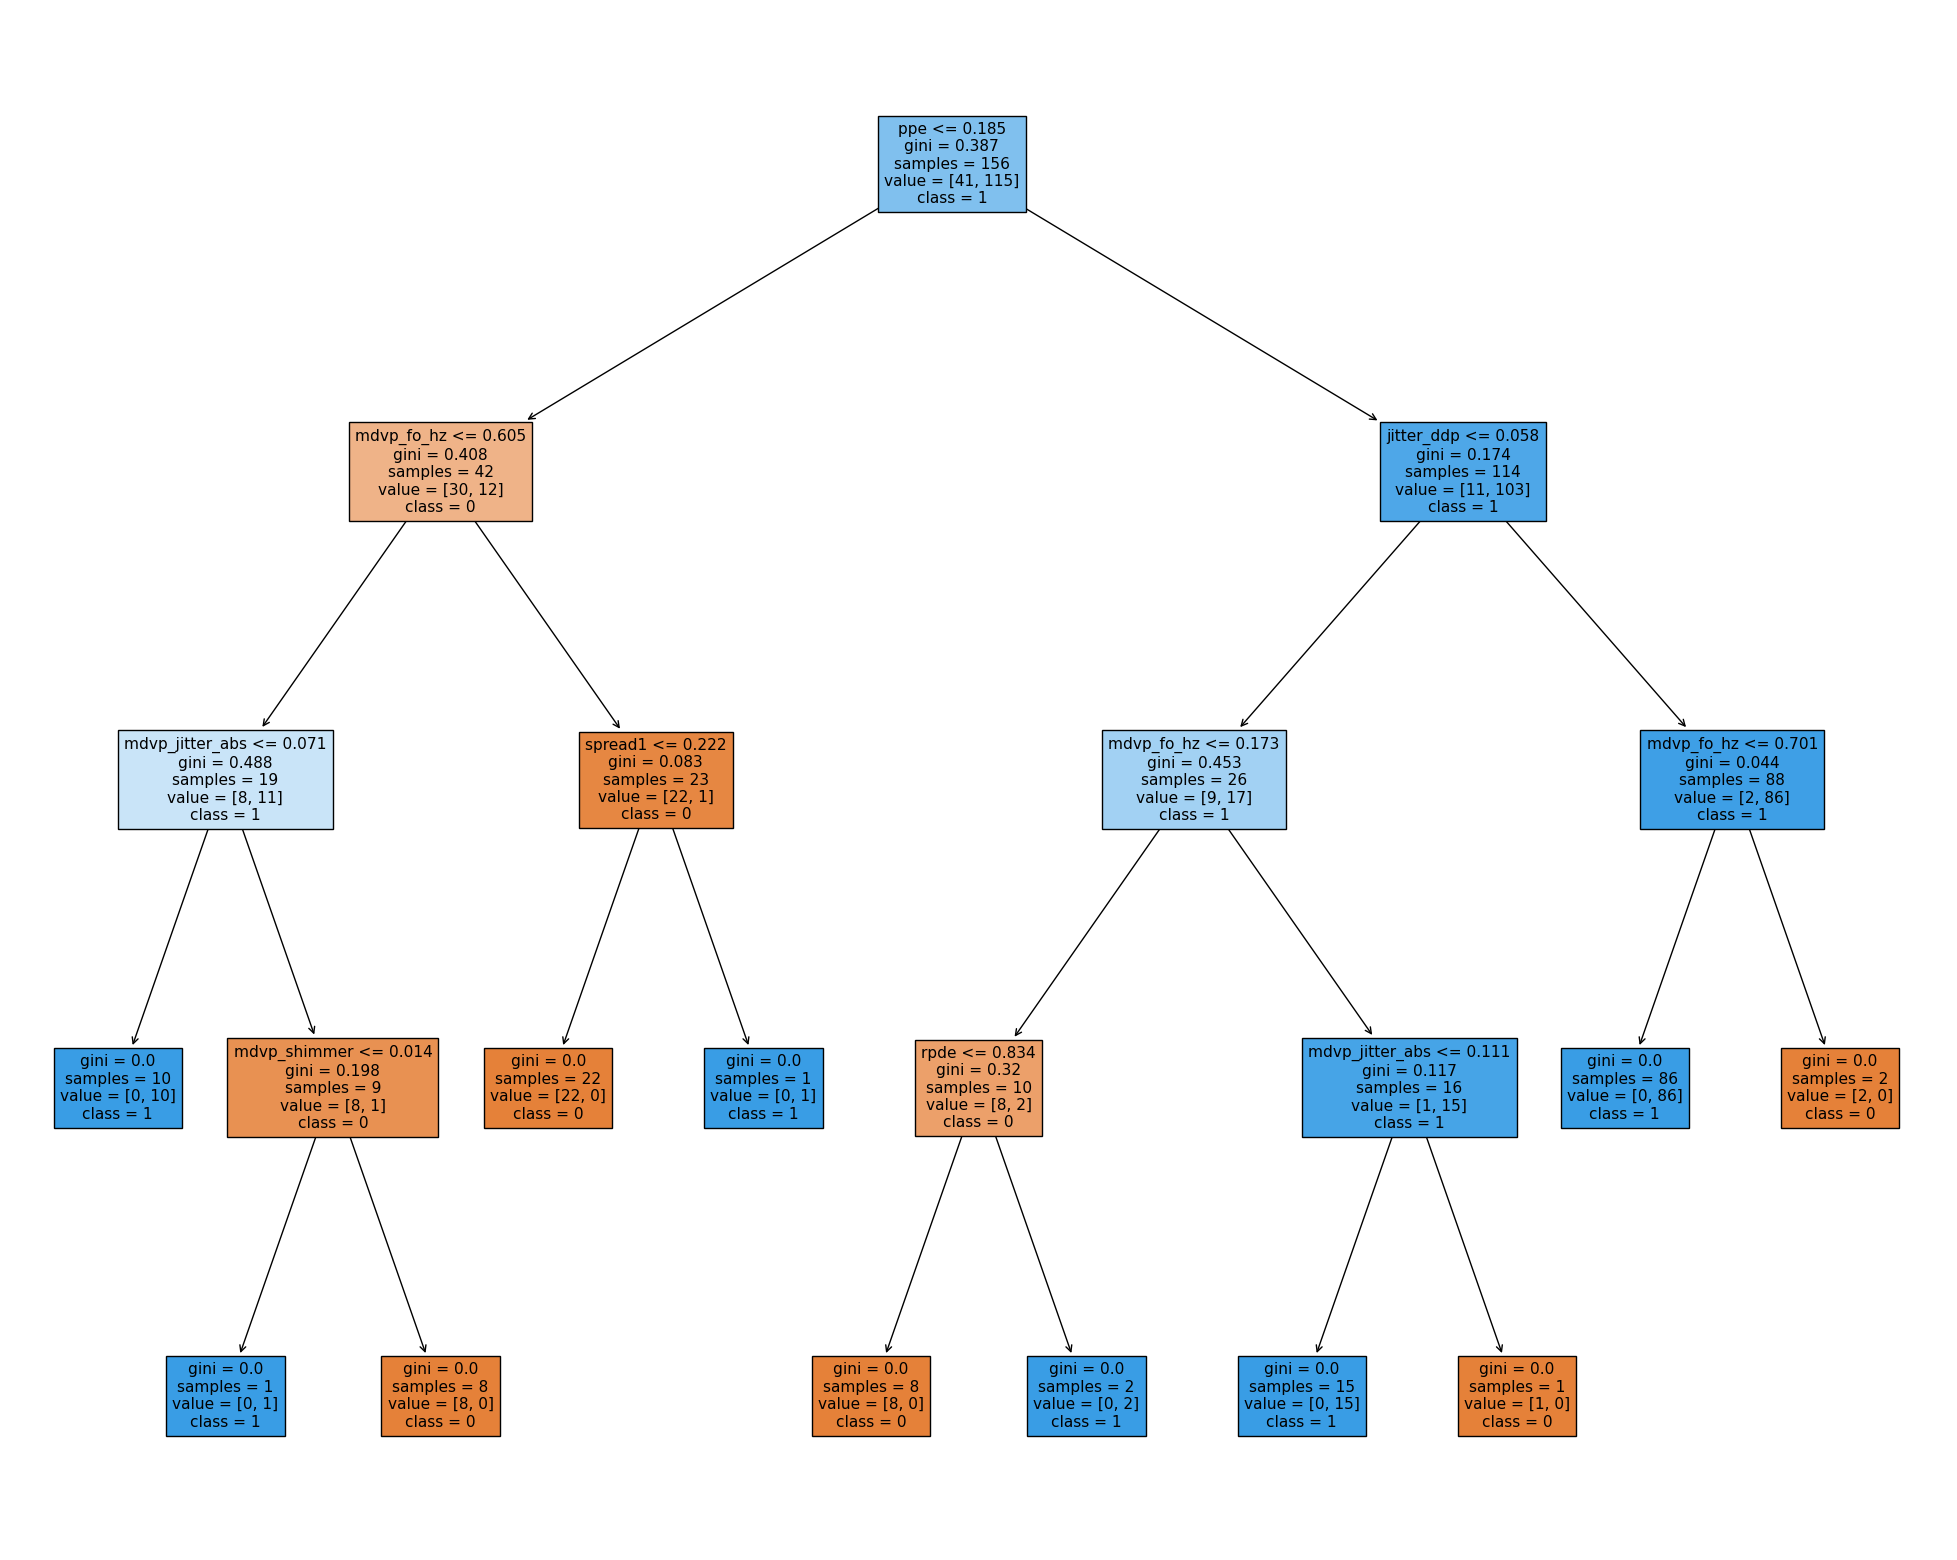

In [26]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in df.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

In [28]:
def tune_clf_hyperparameters(clf, param_grid, X_train_scaled, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [29]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [30]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
best_dt, best_dt_hyperparams

(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0),
 {'criterion': 'entropy',
  'max_depth': 2,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.4 |</span><span style='color:#86B7E8'> Random Forest Classifier</span></b>

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 89.62
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


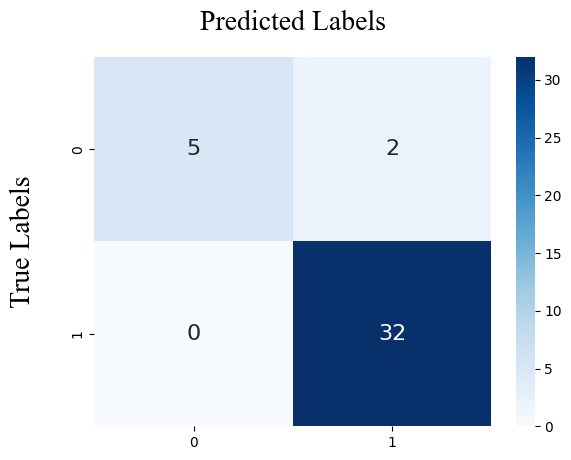

--------------------------------------------------------------------------------


In [31]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.5|</span><span style='color:#86B7E8'> K Neighbors Classifier</span></b>

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


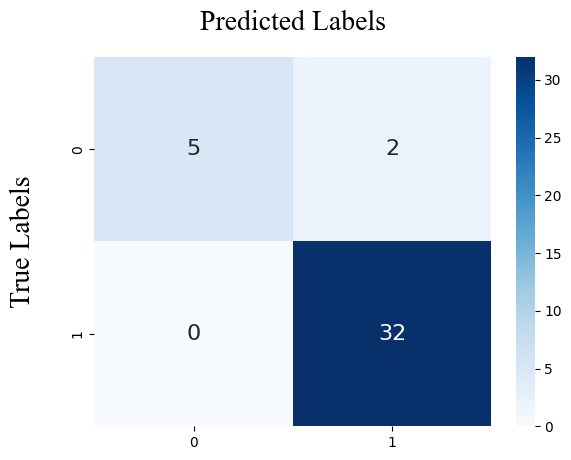

--------------------------------------------------------------------------------


In [32]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 7 | Conclusion</p>
​


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_pred_LR, y_pred_SVM, y_pred_DTC, y_pred_RFC, y_pred_KNN are your prediction arrays
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine(linear)', y_pred_SVM),
    ('Decision Tree', y_pred_DTC),
    ('Random Forest', y_pred_RFC),
    ('K-Nearest Neighbor', y_pred_KNN)
]

results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })
    

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Define a function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight_max function to the relevant columns
highlight_cols = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
results_df_highlighted = results_df.style.apply(highlight_max, subset=highlight_cols, axis=1)

print("Results without balancing the dataset:")
print('-' * 70)
display(results_df_highlighted)


Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


In [34]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},
    
    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)}, 

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},
    
]
first_scenario_results = pd.DataFrame(first_scenario_results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
first_scenario_results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


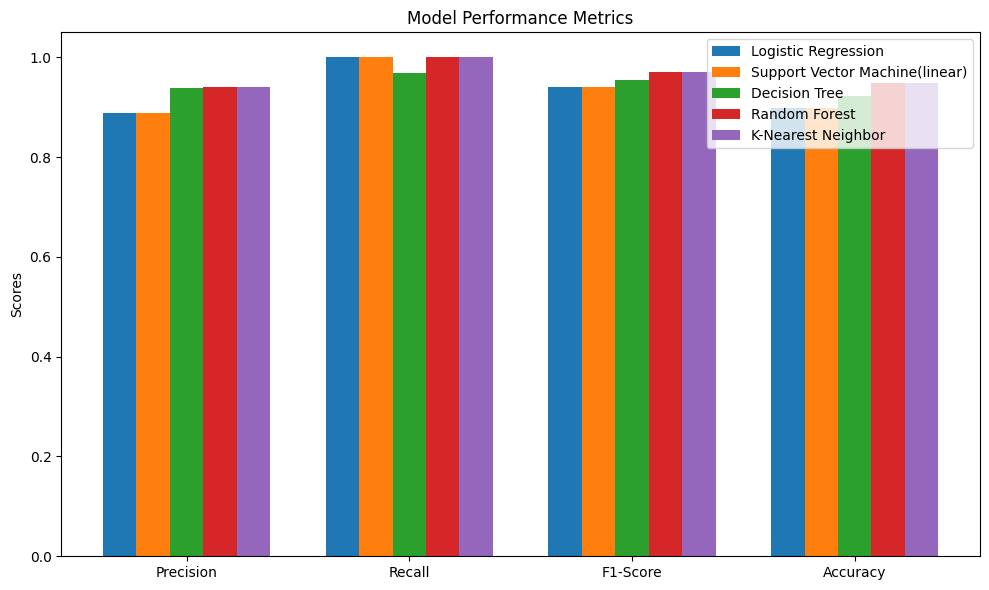

In [35]:


# Your result data
data = [
    {'Model': 'Logistic Regression', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Support Vector Machine(linear)', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Decision Tree', 'Precision': 0.939394, 'Recall': 0.968750, 'F1-Score': 0.953846, 'Accuracy': 0.923077},
    {'Model': 'Random Forest', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718},
    {'Model': 'K-Nearest Neighbor', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718}
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the Model column as the index
results_df.set_index('Model', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(results_df.index):
    values = results_df.loc[model, metrics]
    ax.bar(x + i * width, values, width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + (len(results_df) / 2 - 0.5) * width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

In [36]:
# Sort the DataFrame by 'Accuracy' column in descending order
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Get the best model (the one with the highest accuracy)
best_model = results_df_sorted.iloc[0]

print("Best Model:")
print(best_model)


Best Model:
Precision    0.941176
Recall       1.000000
F1-Score     0.969697
Accuracy     0.948718
Name: Random Forest, dtype: float64
